In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_pre=pd.read_csv("C://Users//Ananthram Vasu//Downloads//kidney_disease.csv")
df_pre.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df_pre.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
df_pre.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [8]:
countofzero = (df_pre == 0).sum()
countofzero

id                  1
age                 0
bp                  0
sg                  0
al                199
su                290
rbc                 0
pc                  0
pcc                 0
ba                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [9]:
columns_with_zero = countofzero[countofzero > 0.5].index
columns_with_zero

Index(['id', 'al', 'su'], dtype='object')

In [13]:
df_pre=df_pre.drop(columns = ['id','al', 'su'])

In [14]:
df_pre

,age,bp,sg,rbc,pc,pcc,ba,bgr,bu,sc,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,normal,normal,notpresent,notpresent,423.0,53.0,1.8,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,normal,abnormal,present,notpresent,117.0,56.0,3.8,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,normal,normal,notpresent,notpresent,106.0,26.0,1.4,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,normal,normal,notpresent,notpresent,140.0,49.0,0.5,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,normal,normal,notpresent,notpresent,75.0,31.0,1.2,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,normal,normal,notpresent,notpresent,100.0,26.0,0.6,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,normal,normal,notpresent,notpresent,114.0,50.0,1.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [16]:
#identifying the columns of categorical datatype
catcols = df_pre.select_dtypes(include=['object']).columns
catcols

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [20]:
df_catcols = df_pre[['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane', 'classification']]
df_catcols

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


In [21]:
df_pre = df_pre.drop(columns=['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane', 'classification'])
df_pre

,age,bp,sg,bgr,bu,sc,sod,pot,hemo
0,48.0,80.0,1.020,121.0,36.0,1.2,NaN,NaN,15.4
1,7.0,50.0,1.020,NaN,18.0,0.8,NaN,NaN,11.3
2,62.0,80.0,1.010,423.0,53.0,1.8,NaN,NaN,9.6
3,48.0,70.0,1.005,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,1.010,106.0,26.0,1.4,NaN,NaN,11.6
...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,140.0,49.0,0.5,150.0,4.9,15.7
396,42.0,70.0,1.025,75.0,31.0,1.2,141.0,3.5,16.5
397,12.0,80.0,1.020,100.0,26.0,0.6,137.0,4.4,15.8
398,17.0,60.0,1.025,114.0,50.0,1.0,135.0,4.9,14.2


In [22]:
df_pre.isnull().sum()

age      9
bp      12
sg      47
bgr     44
bu      19
sc      17
sod     87
pot     88
hemo    52
dtype: int64

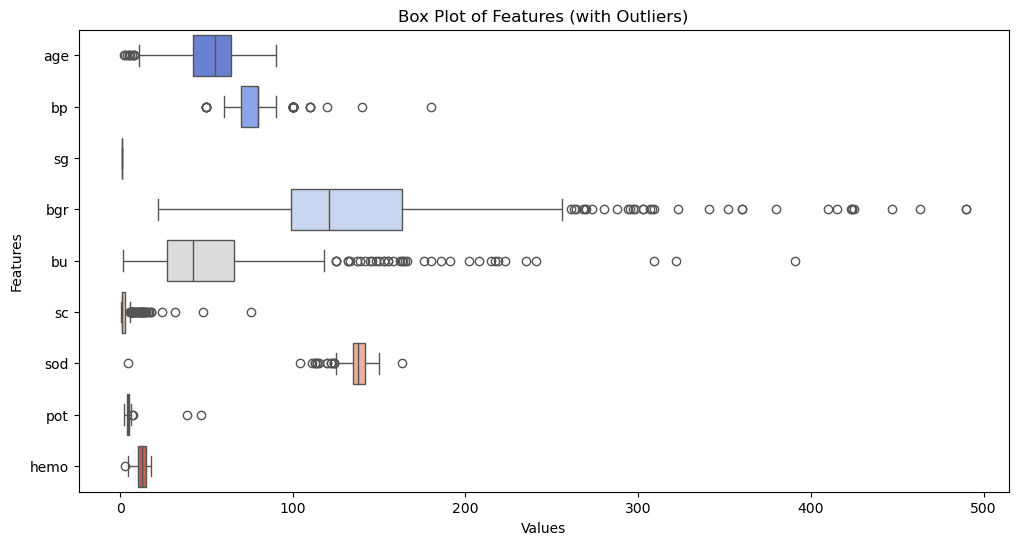

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_pre, orient="h", palette="coolwarm", showfliers=True)
plt.title("Box Plot of Features (with Outliers)")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

In [24]:
df_pre = df_pre.fillna(df_pre.median())
df_pre.head()

,age,bp,sg,bgr,bu,sc,sod,pot,hemo
0,48.0,80.0,1.020,121.0,36.0,1.2,138.0,4.4,15.4
1,7.0,50.0,1.020,121.0,18.0,0.8,138.0,4.4,11.3
2,62.0,80.0,1.010,423.0,53.0,1.8,138.0,4.4,9.6
3,48.0,70.0,1.005,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,1.010,106.0,26.0,1.4,138.0,4.4,11.6


In [25]:
df_pre.isnull().sum()

age     0
bp      0
sg      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
dtype: int64

In [26]:
countofzero = (df_pre == 0).sum()
countofzero

age     0
bp      0
sg      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
dtype: int64

In [27]:
#since there is no zeros and null in our numerical dataset let us now proceed outlier treatment

In [28]:
# Detect outliers using IQR
Q1 = df_pre.quantile(0.25)
Q3 = df_pre.quantile(0.75)
IQR = Q3 - Q1

# Outlier conditions (values outside 1.5*IQR range)
outliers = ((df_pre < (Q1 - 1.5 * IQR)) | (df_pre > (Q3 + 1.5 * IQR)))

# Count of outliers per column
outlier_counts = outliers.sum()
outlier_counts

age     10
bp      36
sg       7
bgr     53
bu      41
sc      53
sod     18
pot     14
hemo     2
dtype: int64

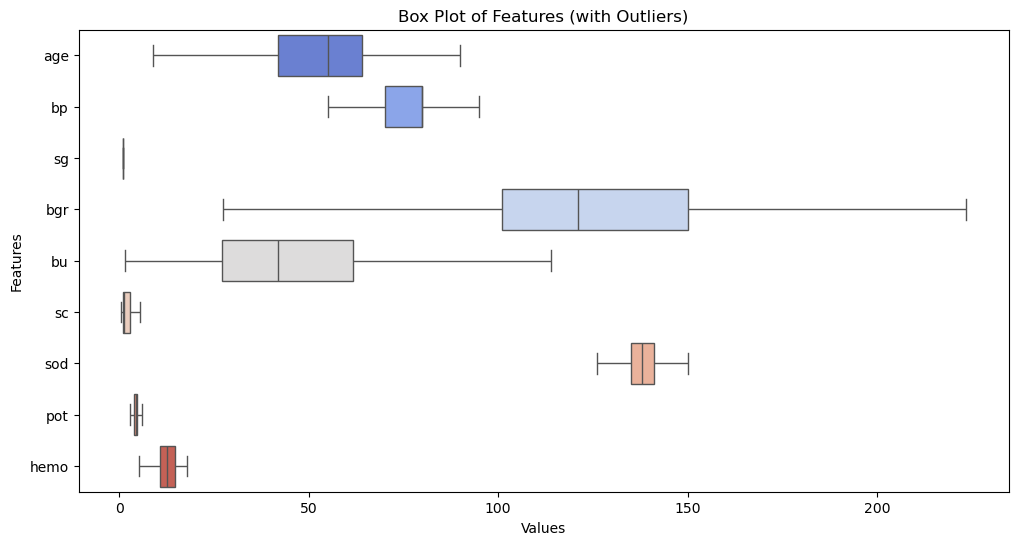

In [29]:
# Treating Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping (Winsorization)
df_pre= df_pre.copy()
df_pre = df_pre.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Verify if outliers are capped
outliers_after = ((df_pre < (Q1 - 1.5 * IQR)) | (df_pre > (Q3 + 1.5 * IQR))).sum()
outliers_after
#visulaizing after outlier treatment
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_pre, orient="h", palette="coolwarm", showfliers=True)
plt.title("Box Plot of Features (with Outliers)")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_catcols.columns:
    df_catcols[col] = le.fit_transform(df_catcols[col])

C:\Users\Ananthram Vasu\AppData\Local\Temp\ipykernel_46708\3473007709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_catcols[col] = le.fit_transform(df_catcols[col])
C:\Users\Ananthram Vasu\AppData\Local\Temp\ipykernel_46708\3473007709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_catcols[col] = le.fit_transform(df_catcols[col])
C:\Users\Ananthram Vasu\AppData\Local\Temp\ipykernel_46708\3473007709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [32]:
df_catcols

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,2,1,0,0,30,69,30,1,1,0,0,0,0,0
1,2,1,0,0,24,53,46,0,0,0,0,0,0,0
2,1,1,0,0,17,67,46,0,1,0,1,0,1,0
3,1,0,1,0,18,59,17,1,0,0,1,1,1,0
4,1,1,0,0,21,65,24,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,33,59,27,0,0,0,0,0,0,1
396,1,1,0,0,40,69,40,0,0,0,0,0,0,1
397,1,1,0,0,35,58,32,0,0,0,0,0,0,1
398,1,1,0,0,37,64,37,0,0,0,0,0,0,1


In [34]:
df_final = pd.concat([df_pre, df_catcols], axis=1)

In [35]:
df_final

,age,bp,sg,bgr,bu,sc,sod,pot,hemo,rbc,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.0200,121.0,36.0,1.2,138.0,4.4,15.4,2,...,30,69,30,1,1,0,0,0,0,0
1,9.0,55.0,1.0200,121.0,18.0,0.8,138.0,4.4,11.3,2,...,24,53,46,0,0,0,0,0,0,0
2,62.0,80.0,1.0100,223.5,53.0,1.8,138.0,4.4,9.6,1,...,17,67,46,0,1,0,1,0,1,0
3,48.0,70.0,1.0075,117.0,56.0,3.8,126.0,2.8,11.2,1,...,18,59,17,1,0,0,1,1,1,0
4,51.0,80.0,1.0100,106.0,26.0,1.4,138.0,4.4,11.6,1,...,21,65,24,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.0200,140.0,49.0,0.5,150.0,4.9,15.7,1,...,33,59,27,0,0,0,0,0,0,1
396,42.0,70.0,1.0250,75.0,31.0,1.2,141.0,3.5,16.5,1,...,40,69,40,0,0,0,0,0,0,1
397,12.0,80.0,1.0200,100.0,26.0,0.6,137.0,4.4,15.8,1,...,35,58,32,0,0,0,0,0,0,1
398,17.0,60.0,1.0250,114.0,50.0,1.0,135.0,4.9,14.2,1,...,37,64,37,0,0,0,0,0,0,1


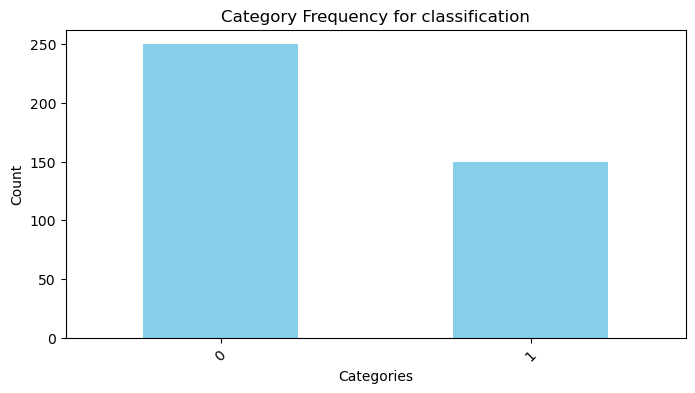

In [36]:
df_final[col].value_counts().plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title(f"Category Frequency for {col}")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [37]:
df_final.columns

Index(['age', 'bp', 'sg', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'rbc', 'pc',
       'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

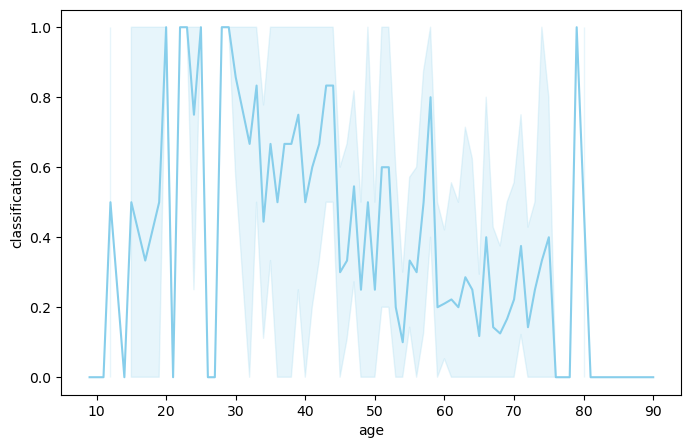

In [39]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_final,x='age',y='classification',color='skyblue')
plt.xlable("AGE")
plt.ylable("Classification")
plt.show()           

<Axes: xlabel='age', ylabel='bp'>

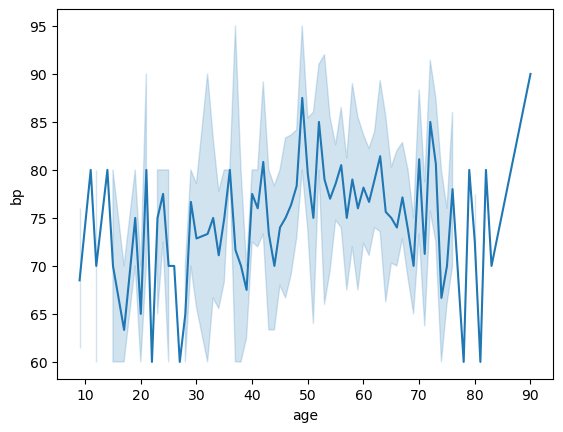

In [47]:
sns.lineplot(data=df_final,x='age',y='bp')      

<Axes: xlabel='age', ylabel='rbc'>

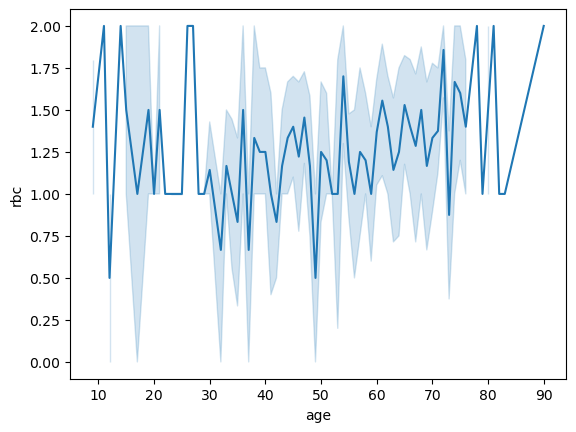

In [48]:
sns.lineplot(data=df_final,x='age',y='rbc')  

In [50]:
#So now we are finished with EDA and outlier treatment now we proceed with model treatment and feature selection and setting target variable.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
X=df_final[['age', 'bp', 'sg', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'rbc', 'pc','pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe','ane']]
y=df_final['classification']

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [53]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

A:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
lgr.score(X_train,y_train)

0.9833333333333333

In [55]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
rfc.score(X_train,y_train)

1.0

In [57]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [58]:
knn.score(X_train,y_train)

0.9033333333333333

In [59]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [60]:
gbc.score(X_train,y_train)

1.0

In [61]:
#By analysing the models we get hundred percent accuracy in RandomForestClassifier and GradientBoostingClassifier
#GradientBoostingClassifier is slow but more accurate than RandommForestClassifier but we use RandomForestClassifier

In [62]:
prediction = rfc.predict(X_test)

In [63]:
prediction = ["ckd" if val == 1 else "notckd" for val in prediction]
for i, pred in enumerate(prediction[:20]):  # Print first 20 predictions
    print(f"Sample {i+1}: {pred}")

Sample 1: notckd
Sample 2: notckd
Sample 3: notckd
Sample 4: notckd
Sample 5: notckd
Sample 6: ckd
Sample 7: notckd
Sample 8: notckd
Sample 9: notckd
Sample 10: notckd
Sample 11: notckd
Sample 12: ckd
Sample 13: ckd
Sample 14: ckd
Sample 15: notckd
Sample 16: ckd
Sample 17: ckd
Sample 18: notckd
Sample 19: ckd
Sample 20: notckd


In [64]:
import joblib

joblib.dump(prediction, 'KidneyDiseaseNotebook.pkl')

['KidneyDiseaseNotebook.pkl']